In [593]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt

In [594]:
num_cluster = 10
num_data_points = 1000
dimension = 3

# Generate Random Centroids

In [595]:
data_points = np.random.rand(num_data_points*dimension).reshape(num_data_points, dimension)

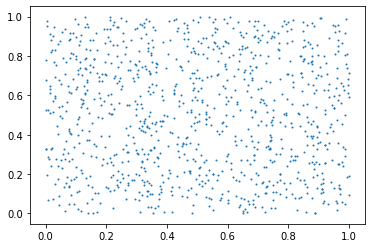

In [596]:
plt.scatter(data_points[:,0], data_points[:,1], s=1)

In [597]:
idx = np.random.randint(num_data_points, size=num_cluster)
centroids = data_points[idx,:]
centroids

array([[0.45607633, 0.88737259, 0.32954504],
       [0.52771294, 0.48079314, 0.88096498],
       [0.89294173, 0.32868875, 0.59348989],
       [0.30147632, 0.94292122, 0.10787607],
       [0.16450134, 0.91618374, 0.9769367 ],
       [0.58154246, 0.4592502 , 0.1109824 ],
       [0.10689917, 0.0246275 , 0.73031525],
       [0.50396382, 0.23310503, 0.56990635],
       [0.69074814, 0.80662644, 0.79687949],
       [0.29079558, 0.356781  , 0.59295062]])

In [598]:
def find_closest_centroids(data_points, centroids):
    '''
    Args:
    data_points: A numpy array with shape: (num_data_points, num_dimensions)
    centroids: A numpy array with shape: (num_cluster, num_dimensions)
    
    Returns:
    A list with cluster numbers
    '''
    
    num_data_points=data_points.shape[0]
    num_dimensions=data_points.shape[1]
    num_centroids=centroids.shape[0]
    centroid_numbers = [0] * num_data_points
    
    for dp in range(num_data_points):
        
        # get one data point
        one_dp = data_points[dp,]
        
        # loop over all the centroids and keep the closest one
        for c in range(num_centroids):
            
            # get one centroid
            one_c = centroids[c,]
            
            # calculate euclidian distance
            if num_dimensions==2:
                dist = np.sqrt(np.sum((one_dp-one_c)**2))
            elif num_dimensions==3:
                dist = np.cbrt(np.sum((one_dp-one_c)**2))
            else:
                # this won't be useful for visualization
                dist = np.sum((one_dp-one_c)**num_dimensions)**(1/num_dimensions)
            
            # keep the shortest distance
            if c==0:
                dist_cache=dist
                centroid_numbers[dp]=0
                
            if dist<dist_cache:
                dist_cache=dist
                centroid_numbers[dp]=c
                
        del dist_cache
    return(centroid_numbers)

In [599]:
def move_centroids(data_points, centroid_nums):
    
    '''
    Args:
    data_points: A numpy array with shape: (num_data_points, num_dimensions)
    centroid_nums: A list of integers showing the cluster numbers
    
    Returns:
    A numpy array with updated cluster centers

    '''
    centroid_numbers = find_closest_centroids(data_points, centroids)
    num_centroids = centroids.shape[0]
    num_dimension=data_points.shape[1]
    num_data_points=data_points.shape[0]
    
    updated_centroids = np.zeros([num_centroids, num_dimension])
    
    for c in range(num_centroids):
        bool_index = [i==c for i in centroid_numbers]
        points_in_cluster_c = data_points[bool_index]
        np.array(points_in_cluster_c)
        updated_centroids[c,:] = np.mean(points_in_cluster_c, axis=0)
    return(updated_centroids)

## Running the Algorithm

In [600]:
num_iteration = 20

In [601]:
for i in range(num_iteration):
    clusters = find_closest_centroids(data_points, centroids)
    centroids = move_centroids(data_points, clusters)